In [4]:
%matplotlib inline
from policy_gradient import *
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np

In [3]:
# Vanilla Policy Gradient (without baseline)

vpg = PolicyGradient(env="Pendulum-v0", vanilla=True, gaussian=True, baseline=False, max_steps=300000, batch_size=2048, log_file="trpo_mountaincar.mat")
vpg.train()


Episode: 301 | Reward: -97.041006: 100%|██████████| 300k/300k [02:21<00:00, 2.12kit/s]


In [2]:
# TRPO
trpo = PolicyGradient(env="Pendulum-v0", trpo=True, gaussian=True, baseline=False, max_steps=300000, batch_size=2048, log_file="trpo_mountaincar.mat")
trpo.train()


Episode: 304 | Reward: -104.574523: 100%|██████████| 300k/300k [03:14<00:00, 1.54kit/s]


In [ ]:
# TRPO
ppo = PolicyGradient(env="Pendulum-v0", trpo=True, gaussian=True, baseline=False, max_steps=300000, batch_size=2048, log_file="trpo_mountaincar.mat")
ppo.train()


In [5]:
# Actor Critic (with baseline)

trpo = PolicyGradient(env="Pendulum-v0", trpo=True, actorcritic=False, vanilla=False, gaussian=True, baseline=True, max_steps=5000000, batch_size=2048, log_file="trpo_pendulum.mat")
trpo.train()

Episode: 24999 | Reward: -681.285775: 100%|██████████| 5.00M/5.00M [43:33<00:00, 1.91kit/s]


In [6]:
# Actor Critic (with baseline)

ppo = PolicyGradient(env="Pendulum-v0", ppo=True, actorcritic=False, vanilla=False, gaussian=True, baseline=True, max_steps=5000000, batch_size=2048, log_file="ppo_pendulum.mat")
ppo.train()

Episode: 24999 | Reward: -1651.889275: 100%|██████████| 5.00M/5.00M [50:18<00:00, 1.66kit/s]


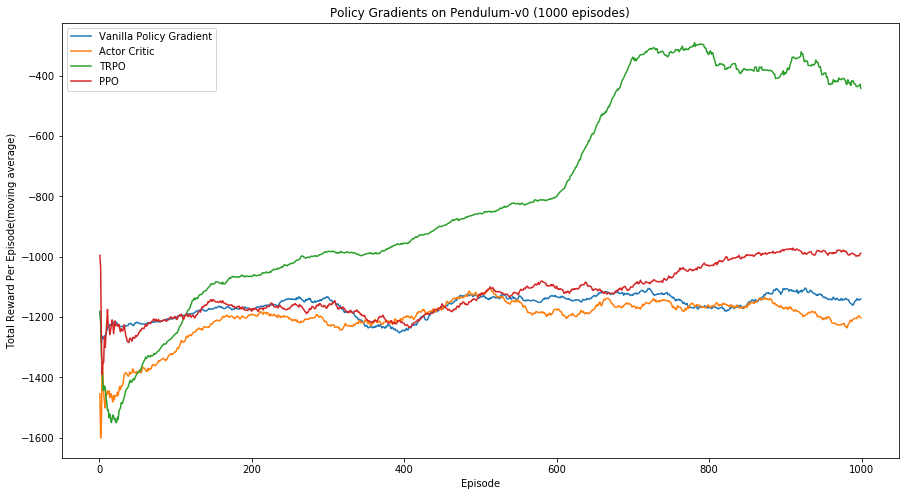

In [49]:

def moving_average(y, n=100):
    ma = []
    for i in range(len(y)):
        if i >= 100:
            ma.append(np.mean(y[i-n:i]))
        else:
            ma.append(np.mean(y[:i]))
    return ma



vpg = io.loadmat("./vanillapg_baseline_pendulum.mat")
ac = io.loadmat("./actorcritic_pendulum.mat")
trpo = io.loadmat("./trpo_pendulum.mat")
# trpo = io.loadmat("./trpo.mat")
ppo = io.loadmat("./ppo_pendulum.mat")

# ac_baseline = io.loadmat("./actorcritic_baseline_pendulum.mat")

plt.rcParams["figure.figsize"] = 15, 8
plt.plot(vpg["Episodes"][0][:1000], moving_average(vpg["Reward per Episode"][0][:1000]), label="Vanilla Policy Gradient")
plt.plot(ac["Episodes"][0][:1000], moving_average(ac["Reward per Episode"][0][:1000]), label="Actor Critic")
plt.plot(trpo["episodes"][0], moving_average(trpo["Reward per Episode"][0], 100), label="TRPO")
plt.plot(ppo["Episode"][0][:1000], moving_average(ppo["Reward per Episode"][0][:1000]), label="PPO")
plt.xlabel("Episode")
plt.ylabel("Total Reward Per Episode(moving average)")
plt.title("Policy Gradients on Pendulum-v0 (1000 episodes)")
plt.legend()
plt.savefig("Policy_Gradients_1000_episodes.jpg")

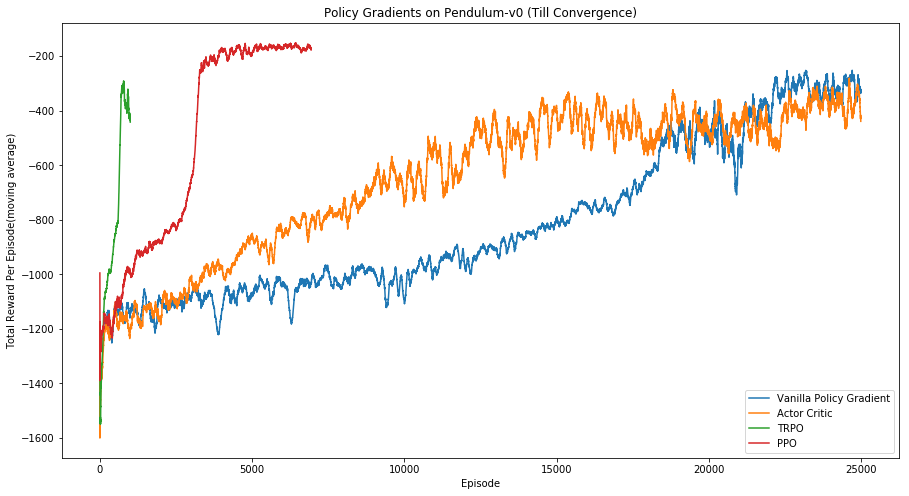

In [50]:
plt.rcParams["figure.figsize"] = 15, 8
plt.plot(vpg["Episodes"][0], moving_average(vpg["Reward per Episode"][0]), label="Vanilla Policy Gradient")
plt.plot(ac["Episodes"][0], moving_average(ac["Reward per Episode"][0]), label="Actor Critic")
plt.plot(trpo["episodes"][0], moving_average(trpo["Reward per Episode"][0], 100), label="TRPO")
plt.plot(ppo["Episode"][0], moving_average(ppo["Reward per Episode"][0]), label="PPO")
plt.xlabel("Episode")
plt.ylabel("Total Reward Per Episode(moving average)")
plt.title("Policy Gradients on Pendulum-v0 (Till Convergence)")
plt.legend()
plt.savefig("Policy_Gradients_full.jpg")